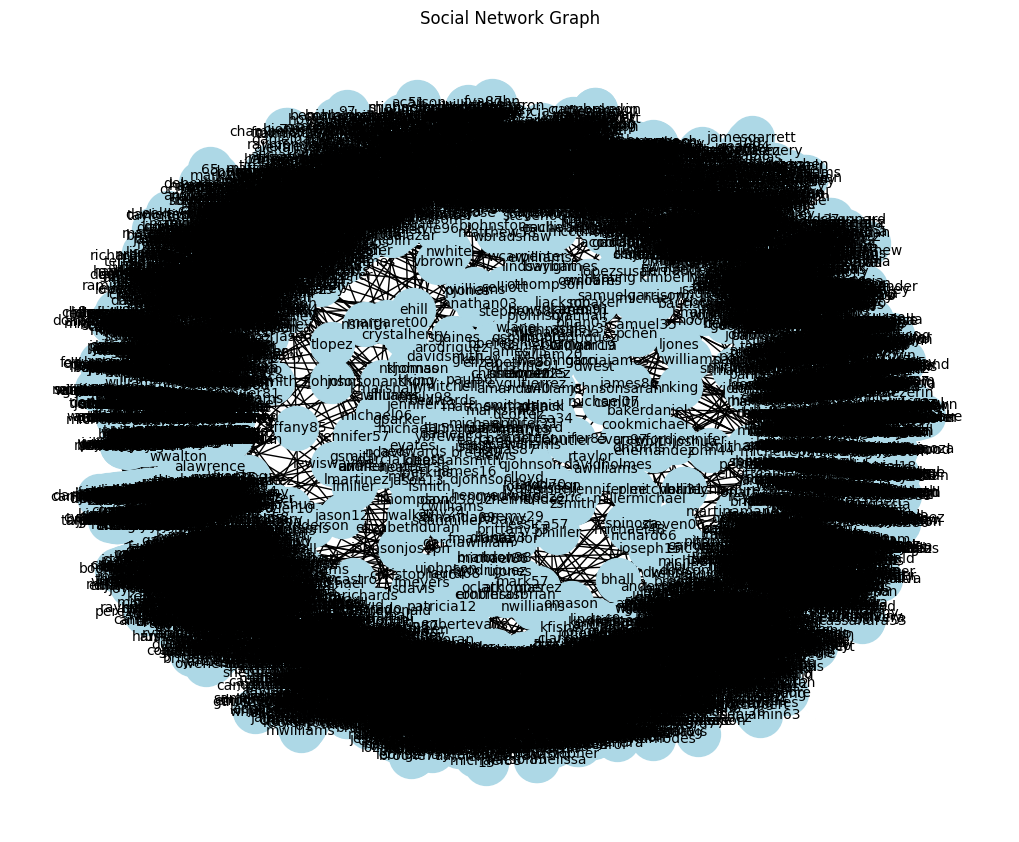

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('twitter_dataset.csv')

# Create an empty directed graph
social_network_graph = nx.DiGraph()

# Add edges (interactions) to the graph
for index, row in data.iterrows():
    # Add edge for retweet (if applicable)
    if not pd.isnull(row['Retweets']):
        social_network_graph.add_edge(row['Username'], row['Retweets'], interaction='retweet')
    # Add edge for mention (if applicable)
    # Assuming mentions are represented in the 'Text' column
    if '@' in row['Text']:
        mentioned_users = [word.strip('@') for word in row['Text'].split() if word.startswith('@')]
        for user in mentioned_users:
            social_network_graph.add_edge(row['Username'], user, interaction='mention')

# Visualize the graph
plt.figure(figsize=(10, 8))
nx.draw(social_network_graph, with_labels=True, node_color='lightblue', node_size=1000, arrowsize=20, font_size=10)
plt.title("Social Network Graph")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('twitter_dataset.csv')

# Preprocessing
# Collect all unique usernames from both 'Username' and 'Retweets' columns
unique_usernames = set(pd.concat([data['Username'], data['Retweets'].fillna('')]))
# Encode all unique usernames
username_encoder = LabelEncoder()
username_encoder.fit(list(unique_usernames))

# Sort data by timestamp
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.sort_values(by='Timestamp', inplace=True)

# Construct sequences of interactions over time
sequences = []
for _, row in data.iterrows():
    interaction_sequence = []
    interaction_sequence.append(username_encoder.transform([row['Username']])[0])  # Add the encoded user
    if not pd.isnull(row['Retweets']):
        interaction_sequence.append(username_encoder.transform([row['Retweets']])[0])  # Add the encoded retweeted user
    # For simplicity, we'll not include Likes and only focus on usernames, retweets, and mentions
    mentions = [mention.strip('@') for mention in row['Text'].split() if mention.startswith('@')]  # Extract mentioned users
    mentions_encoded = username_encoder.transform(mentions)  # Encode mentioned users
    interaction_sequence.extend(mentions_encoded)  # Add the encoded mentioned users
    sequences.append(interaction_sequence)

# Pad sequences to ensure equal length
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Split data into features (X) and target (y)
X = padded_sequences[:, :-1]  # Features (excluding the last interaction)
y = padded_sequences[:, -1]   # Target (the last interaction)

# Define and train LSTM model with embedding layers
model = Sequential()
model.add(Embedding(input_dim=len(username_encoder.classes_) + 1, output_dim=100, input_length=max_sequence_length-1))  # Add embedding layer for usernames
model.add(LSTM(units=64))
model.add(Dense(units=len(username_encoder.classes_) + 1, activation='softmax'))  # Output layer with softmax activation

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=10, batch_size=32)

# Generate predictions
predictions = model.predict(X)
predicted_classes = np.argmax(predictions, axis=1)

# Reverse label encoding to get usernames
predicted_usernames = username_encoder.inverse_transform(predicted_classes)



Epoch 1/10
313/313 [==============================] - 16s 35ms/step - loss: 7.3634 - accuracy: 0.0097
Epoch 2/10
313/313 [==============================] - 10s 33ms/step - loss: 4.6610 - accuracy: 0.0089
Epoch 3/10
313/313 [==============================] - 10s 32ms/step - loss: 4.6246 - accuracy: 0.0101
Epoch 4/10
313/313 [==============================] - 10s 31ms/step - loss: 4.6095 - accuracy: 0.0106
Epoch 5/10
313/313 [==============================] - 9s 28ms/step - loss: 4.5828 - accuracy: 0.0106
Epoch 6/10
313/313 [==============================] - 10s 32ms/step - loss: 4.4844 - accuracy: 0.0145
Epoch 7/10
313/313 [==============================] - 10s 31ms/step - loss: 4.1445 - accuracy: 0.0399
Epoch 8/10
313/313 [==============================] - 11s 35ms/step - loss: 3.6804 - accuracy: 0.1906
Epoch 9/10
313/313 [==============================] - 9s 29ms/step - loss: 2.7042 - accuracy: 0.4803
Epoch 10/10
313/313 [==============================] - 2s 5ms/step


<ipython-input-4-c3c54feee2ae>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(communities))
<ipython-input-4-c3c54feee2ae>:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=range(len(communities)), label='Community')


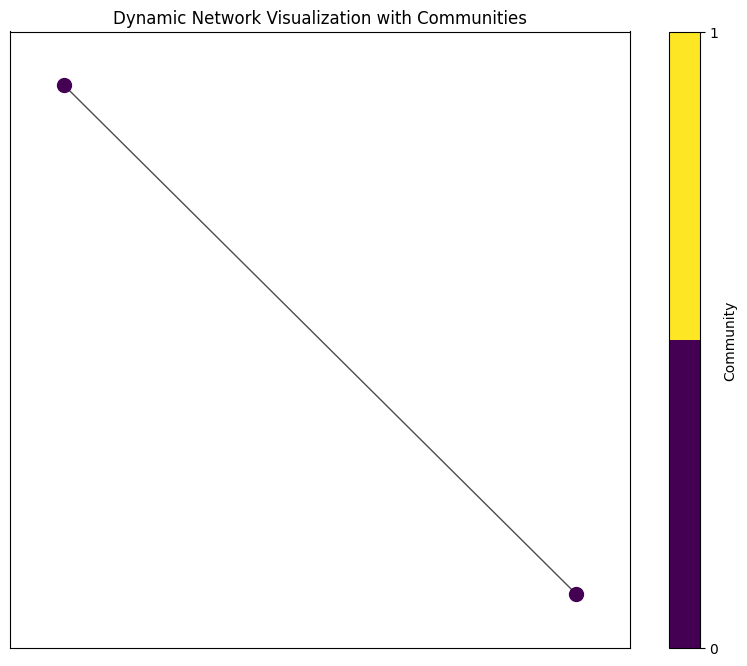

<ipython-input-4-c3c54feee2ae>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(communities))
<ipython-input-4-c3c54feee2ae>:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=range(len(communities)), label='Community')


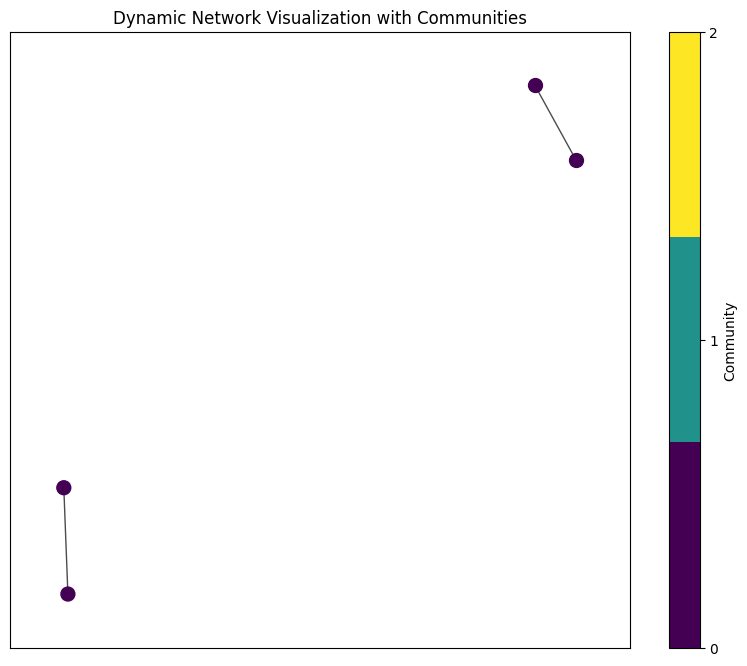

<ipython-input-4-c3c54feee2ae>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(communities))
<ipython-input-4-c3c54feee2ae>:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=range(len(communities)), label='Community')


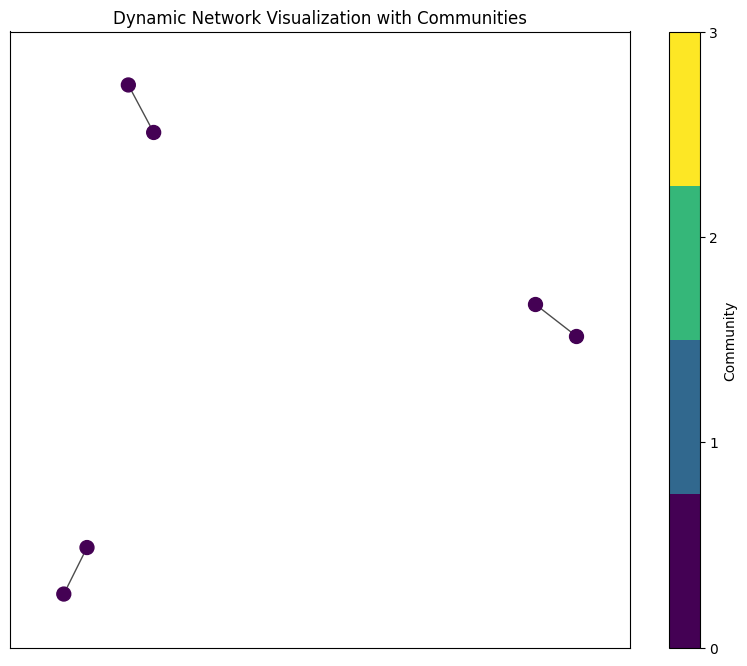

<ipython-input-4-c3c54feee2ae>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(communities))
<ipython-input-4-c3c54feee2ae>:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=range(len(communities)), label='Community')


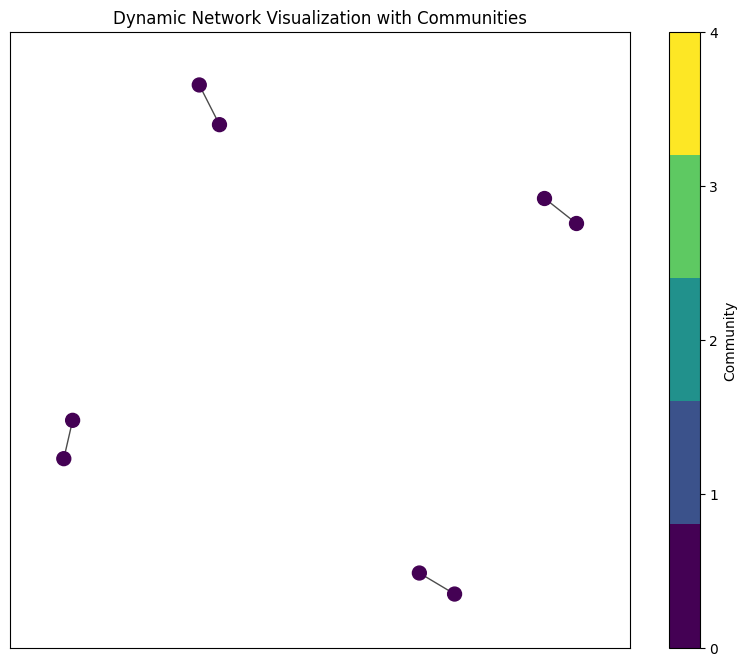

<ipython-input-4-c3c54feee2ae>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(communities))
<ipython-input-4-c3c54feee2ae>:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=range(len(communities)), label='Community')


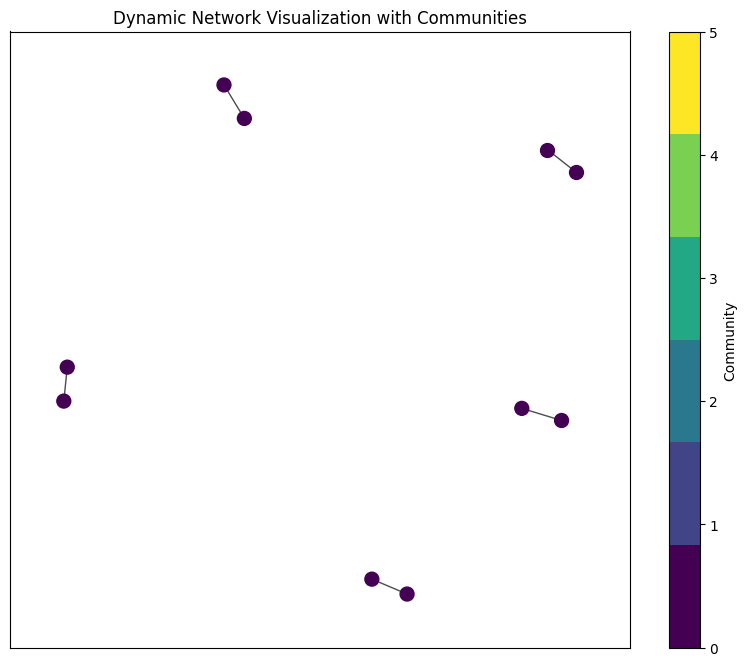

<ipython-input-4-c3c54feee2ae>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(communities))
<ipython-input-4-c3c54feee2ae>:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=range(len(communities)), label='Community')


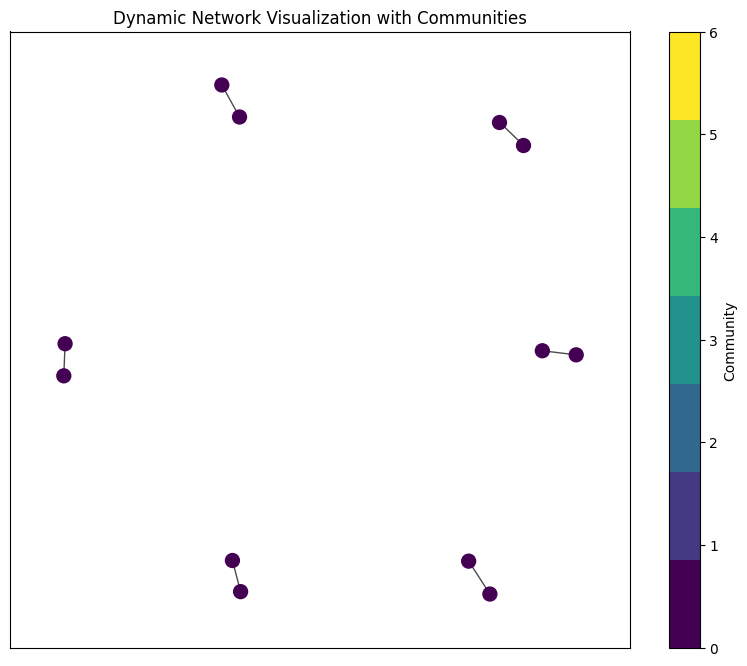

<ipython-input-4-c3c54feee2ae>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(communities))
<ipython-input-4-c3c54feee2ae>:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=range(len(communities)), label='Community')


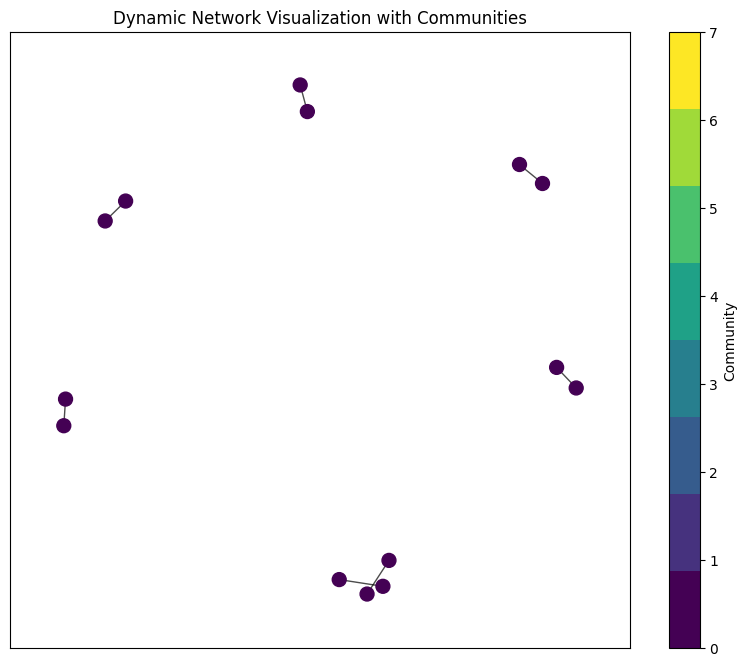

<ipython-input-4-c3c54feee2ae>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(communities))
<ipython-input-4-c3c54feee2ae>:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=range(len(communities)), label='Community')


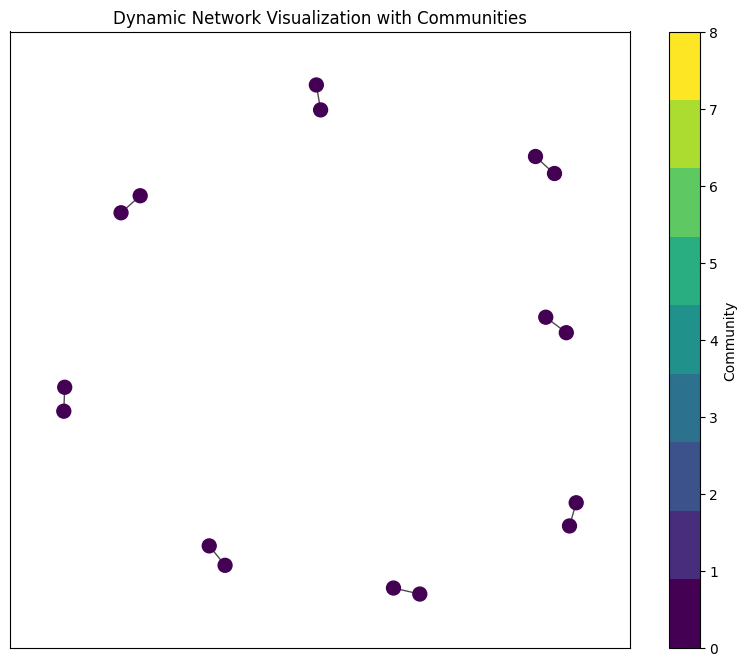

<ipython-input-4-c3c54feee2ae>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(communities))
<ipython-input-4-c3c54feee2ae>:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=range(len(communities)), label='Community')


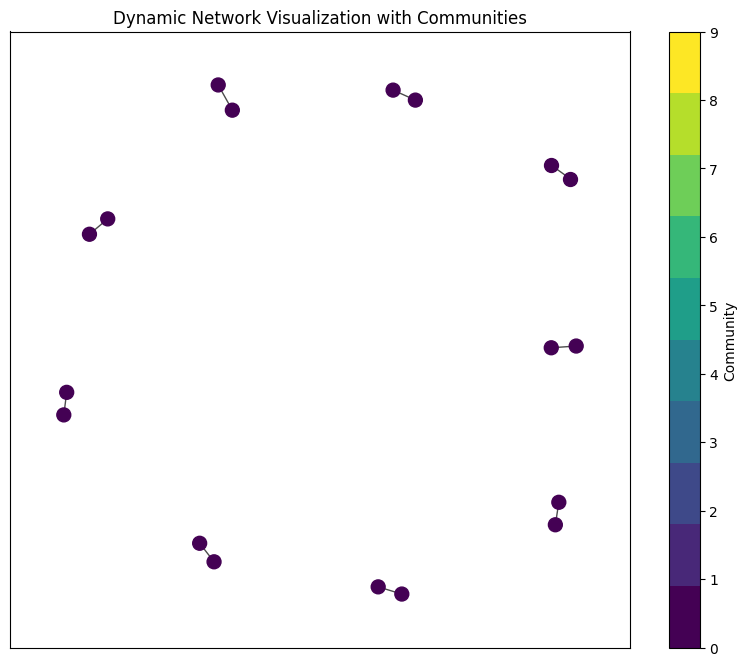

<ipython-input-4-c3c54feee2ae>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(communities))
<ipython-input-4-c3c54feee2ae>:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=range(len(communities)), label='Community')


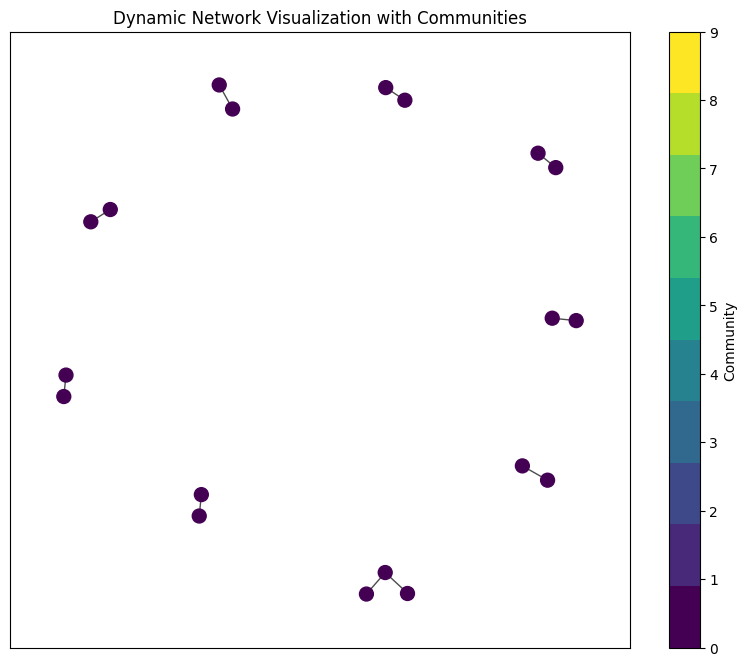

<ipython-input-4-c3c54feee2ae>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(communities))
<ipython-input-4-c3c54feee2ae>:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=range(len(communities)), label='Community')


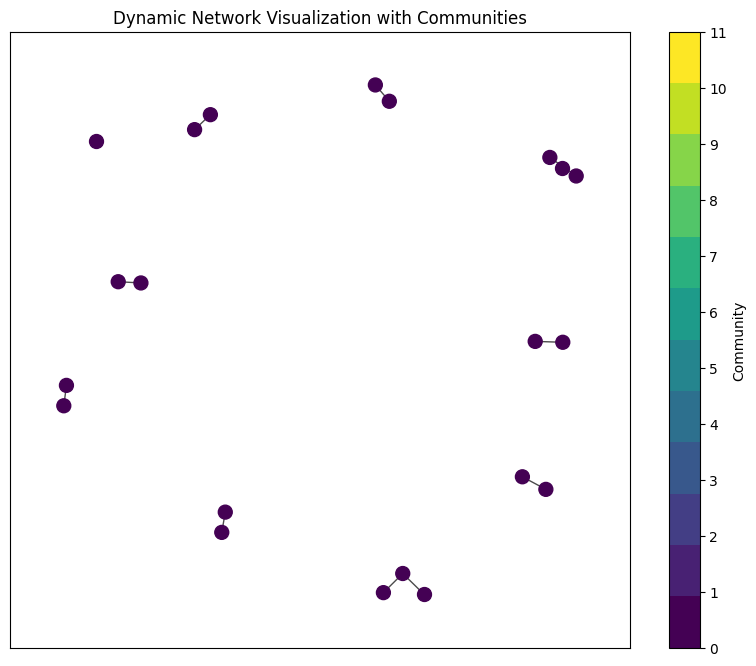

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community.centrality import girvan_newman
import random

# Load the dataset
data = pd.read_csv('twitter_dataset.csv')

# Convert timestamp to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Initialize the graph
G = nx.Graph()

# Function to add edges from dataframe
def add_edges_from_df(df):
    for _, row in df.iterrows():
        if not pd.isnull(row['Retweets']):
            G.add_edge(row['Username'], row['Retweets'])

# Function to plot the graph with communities
def plot_graph_with_communities(G, communities):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)  # Use a fixed seed for consistent layout
    cmap = plt.cm.get_cmap('viridis', len(communities))
    for i, community in enumerate(communities):
        nx.draw_networkx_nodes(G, pos, nodelist=community, node_size=100, cmap=cmap, node_color=[i] * len(community))
    nx.draw_networkx_edges(G, pos, alpha=0.7)
    plt.title("Dynamic Network Visualization with Communities")
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(communities)-1))
    sm.set_array([])
    plt.colorbar(sm, ticks=range(len(communities)), label='Community')
    plt.show()

# Initial graph
add_edges_from_df(data[data['Timestamp'] == data['Timestamp'].min()])

# Girvan-Newman algorithm to detect communities
communities = girvan_newman(G)

# Convert communities generator to list of sets
communities = [c for c in next(communities)]

# Plot initial graph with communities
plot_graph_with_communities(G, communities)

# Simulate changes, such as edge additions or removals
for i in range(10):
    # Simulate edge addition
    new_edge = random.choice(data[['Username', 'Retweets']].values)
    G.add_edge(new_edge[0], new_edge[1])

    # Simulate edge removal
    if len(G.edges) > 10:
        removed_edge = random.choice(list(G.edges()))
        G.remove_edge(*removed_edge)

    # Girvan-Newman algorithm to detect communities
    communities = girvan_newman(G)

    # Convert communities generator to list of sets
    communities = [c for c in next(communities)]

    # Plot the updated graph with communities
    plot_graph_with_communities(G, communities)

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time

def construct_graph(data):
    G = nx.Graph()
    for _, row in data.iterrows():
        G.add_edge(row['Username'], row['Retweets'])
    return G

def girvan_newman(G):
    return nx.algorithms.community.girvan_newman(G)

def read_data_streams(time_limit=3600):
    start_time = time.time()
    data = pd.read_csv('twitter_dataset.csv')
    for index, row in data.iterrows():
        yield row
        if time.time() - start_time > time_limit:
            print("Time limit exceeded. Stopping data stream processing.")
            break

def update_graph(G, new_data):
    G.add_edge(new_data['Username'], new_data['Retweets'])
    return G

def update_model_incrementally(G, communities, new_data):
    G = update_graph(G, new_data)
    communities = girvan_newman(G)
    return G, communities

def visualize_communities(G, communities):
    communities_list = list(communities)
    num_communities = len(communities_list)
    pos = nx.spring_layout(G)
    colors = range(num_communities)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, node_color=colors, cmap=plt.cm.viridis, with_labels=True)
    plt.show()

# Step 1: Initialize the Community Detection Model
initial_data = pd.read_csv('twitter_dataset.csv')
G = construct_graph(initial_data)
communities = girvan_newman(G)

# Step 2: Read Data Streams (This is a continuous process)
time_limit_seconds = 60
data_streams = read_data_streams(time_limit=time_limit_seconds)

# Step 3: Update the Model with New Data
for new_data in data_streams:
    G, communities = update_model_incrementally(G, communities, new_data)


FileNotFoundError: [Errno 2] No such file or directory: 'twitter_dataset.csv'

In [ ]:
import networkx as nx
import numpy as np

def girvan_newman_partition(G, num_partitions=10):
    partitions = []
    for _ in range(num_partitions):
        # Partition the network using Girvan-Newman algorithm
        communities = nx.algorithms.community.girvan_newman(G)
        partition = [tuple(community) for community in next(communities)]
        partitions.append(partition)
    return partitions

def compute_similarity(partitions, num_nodes):
    similarities = np.zeros((num_nodes, len(partitions)))
    for i, partition in enumerate(partitions):
        for node_index, node in enumerate(partition):
            similarities[node_index, i] = 1 if node in partition else 0
    return similarities


def compute_stability_scores(similarities, num_nodes):
    stability_scores = np.zeros(num_nodes)
    for similarity in similarities:
        for node_index, score in enumerate(similarity):
            stability_scores[node_index] += score
    stability_scores /= len(similarities)
    return stability_scores

def assign_communities(stability_scores, threshold=0.5):
    communities = []
    for node_index, score in enumerate(stability_scores):
        if score >= threshold:
            communities.append(node_index)
    return communities

# Example usage:
G = nx.karate_club_graph()
partitions = girvan_newman_partition(G, num_partitions=10)
similarities = compute_similarity(partitions, num_nodes=len(G))
stability_scores = compute_stability_scores(similarities, num_nodes=len(G))
predicted_communities = assign_communities(stability_scores, threshold=0.5)
# Now you can evaluate the F1 score using the predicted communities

In [ ]:
import networkx as nx

def girvan_newman_partition(G, num_partitions):
    return list(nx.algorithms.community.girvan_newman(G))

def compute_modularity(G, communities):
    return nx.algorithms.community.quality.modularity(G, communities)

# Load or generate the graph
G = nx.karate_club_graph()

# Partition the graph using Girvan-Newman algorithm
partitions = girvan_newman_partition(G, num_partitions=10)

# Compute modularity for each partition
for i, partition in enumerate(partitions):
    modularity = compute_modularity(G, partition)
    print(f"Modularity for partition {i+1}: {modularity}")

Modularity for partition 1: 0.3476602762317048
Modularity for partition 2: 0.3423192968647514
Modularity for partition 3: 0.3580611307884035
Modularity for partition 4: 0.3849721706864564
Modularity for partition 5: 0.37578006409175235
Modularity for partition 6: 0.3594760218136841
Modularity for partition 7: 0.3470699574595678
Modularity for partition 8: 0.33324900208017094
Modularity for partition 9: 0.31344052772624204
Modularity for partition 10: 0.3122598901819681
Modularity for partition 11: 0.30368621277712193
Modularity for partition 12: 0.29429733325837226
Modularity for partition 13: 0.28271584115739956
Modularity for partition 14: 0.27116245947414774
Modularity for partition 15: 0.2544648713479881
Modularity for partition 16: 0.23975375274076566
Modularity for partition 17: 0.2268979217031164
Modularity for partition 18: 0.22299057363992417
Modularity for partition 19: 0.20056783043796028
Modularity for partition 20: 0.18696238826108952
Modularity for partition 21: 0.1609134

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import random

# Step 1: Load the dataset and create the initial graph
def load_dataset(file_path):
    df = pd.read_csv('twitter_dataset.csv')
    G = nx.Graph()
    for _, row in df.iterrows():
        G.add_node(row['Username'])
        if not pd.isnull(row['Retweets']):
            G.add_edge(row['Username'], row['Retweets'])
    return G

# Step 2: Simulate changes in the network over time
def simulate_changes(G, num_iterations=10):
    for i in range(num_iterations):
        # Randomly select an operation: edge addition or removal
        operation = random.choice(['add_edge', 'remove_edge'])

        if operation == 'add_edge':
            # Simulate edge addition
            node1 = random.choice(list(G.nodes()))
            node2 = random.choice(list(G.nodes()))
            if node1 != node2 and not G.has_edge(node1, node2):
                G.add_edge(node1, node2)
                print(f"Added edge: {node1} - {node2}")
        else:
            # Simulate edge removal
            if len(G.edges()) > 0:
                edge_to_remove = random.choice(list(G.edges()))
                G.remove_edge(*edge_to_remove)
                print(f"Removed edge: {edge_to_remove[0]} - {edge_to_remove[1]}")

        # Plot the graph after each change
        visualize_graph(G)

# Step 3: Apply Louvain algorithm for dynamic community detection
def detect_communities_louvain_dynamic(G):
    partition = {}  # Store community assignments
    for i, snap in enumerate(nx.algorithms.community.asyn_louvain_communities(G)):
        for node, comm in snap.items():
            partition[node] = comm

    return partition

# Step 4: Visualize the graph
def visualize_graph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=300, edge_color='gray', linewidths=0.5)
    plt.title('Dynamic Network')
    plt.show()

# Main function
def main():
    # Load the dataset and create the initial graph
    file_path = 'twitter_dataset.csv'  # Replace 'your_dataset.csv' with the actual path to your dataset
    G = load_dataset(file_path)

    # Simulate changes in the network over time
    simulate_changes(G)

    # Detect communities using Louvain algorithm
    partition = detect_communities_louvain_dynamic(G)

    # Visualize the community structure
    visualize_graph(G)

if __name__ == "_main_":
    main()